# Lab Exam 1A

In [45]:
from commonfunctions import *
from BassemFunctions import *
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import all modules from LabsMethods folder
from LabsMethods.Morph import *
from LabsMethods.ContrastEnhancement import *
from LabsMethods.EdgeDetection import *
from LabsMethods.Segmentation import *
from LabsMethods.Segmentation2 import *
from LabsMethods.Smoothing import *
from HelperForQuestion.ImproveImage import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Question 1

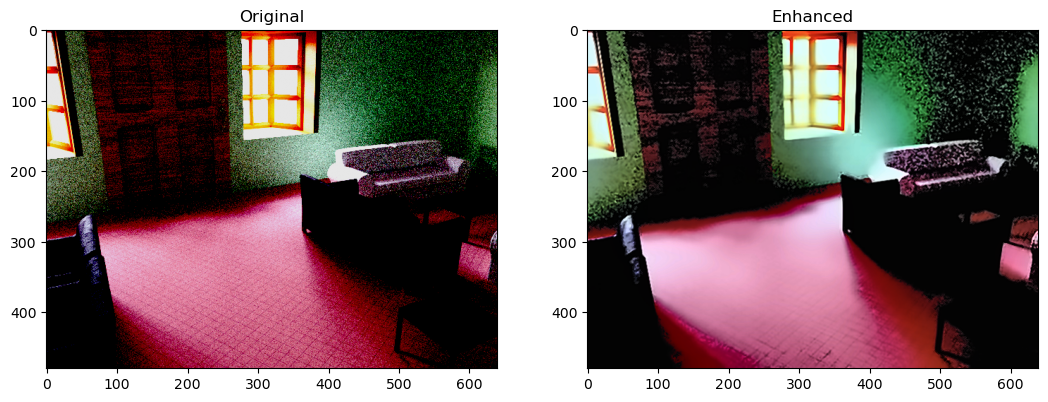

In [ ]:

# Example usage with updated parameters
custom_params = {
    'median_kernel': 3,
    'gaussian_kernel': (3,3),
    'gaussian_sigma': 1,
    'clahe_clip': 2.0,
    'clahe_grid': (3,3),
    'nlmeans_h': 15,
    'nlmeans_template': 11,
    'nlmeans_search': 35,
    'sharpen_strength': 5,
    'white_balance_strength': 1
}

# Process image
img_rgb = preprocess_image('Q1.png', 'rgb')
enhanced_image = enhance_image(img_rgb, custom_params)

# Show results
show_images([img_rgb, enhanced_image], 
           ['Original', 'Enhanced'])

### Question 2

### Question 4

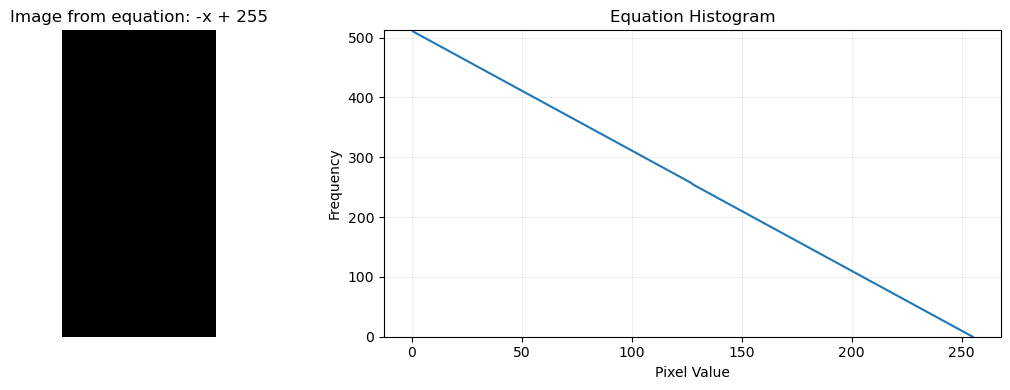

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
import cv2

def create_equation_histogram(equation_str, width=256, height=512, y_max=None):
    """
    Create histogram and image from mathematical equation.
    
    Args:
        equation_str: String equation in terms of x (e.g., '2*x + 1', 'x**2')
        width: Image width
        height: Image height
        y_max: Maximum y-axis value for histogram
    """
    # Convert string equation to symbolic expression
    x = sp.Symbol('x')
    expr = parse_expr(equation_str)
    
    # Create x values and evaluate equation
    x_vals = np.linspace(0, 255, 256)
    equation_func = sp.lambdify(x, expr, 'numpy')
    y_vals = equation_func(x_vals)
    
    # Normalize y values to fit height
    y_vals = np.clip(y_vals, 0, None)  # Remove negative values
    y_vals = (y_vals / y_vals.max() * height).astype(int)
    
    # Create image
    image = np.zeros((height, width), dtype=np.uint8)
    current_row = 0
    
    for intensity, count in enumerate(y_vals):
        count = int(count)
        if current_row + count > height:
            count = height - current_row
        if count > 0:
            image[current_row:current_row+count, :] = intensity
            current_row += count
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Show image
    ax1.imshow(image, cmap='gray')
    ax1.set_title(f'Image from equation: {equation_str}')
    ax1.axis('off')
    
    # Show histogram
    histogram = np.histogram(image.ravel(), bins=256, range=(0, 256))[0]
    ax2.plot(x_vals, y_vals)
    ax2.set_title('Equation Histogram')
    ax2.set_xlabel('Pixel Value')
    ax2.set_ylabel('Frequency')
    ax2.grid(True, alpha=0.2)
    
    if y_max is not None:
        ax2.set_ylim(0, y_max)
    
    plt.tight_layout()
    plt.show()
    
    return image

# Test with different equations
linear_img = create_equation_histogram('-x + 255', y_max=512)
# quadratic_img = create_equation_histogram('0.01*x**2', y_max=800)
# sine_img = create_equation_histogram('200*sin(x/30) + 300', y_max=600)
# exp_img = create_equation_histogram('500*exp(-x/100)', y_max=600)